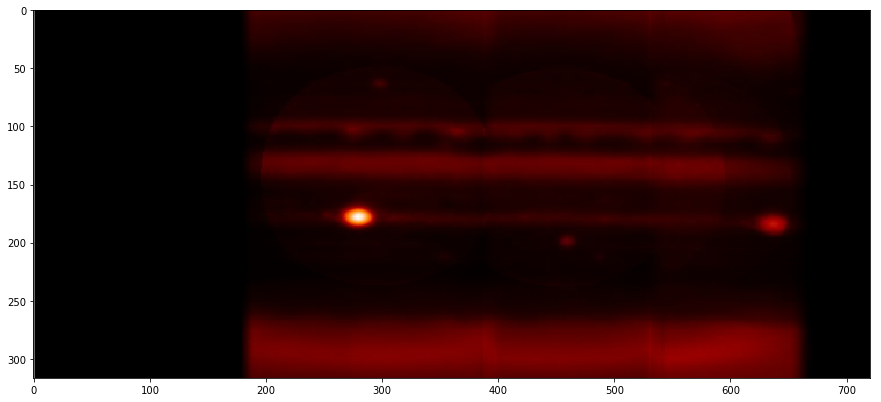

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15,12))
plt.imshow(mpimg.imread('../imgs/2017may_2.12_lmap.png'))
plt.show()

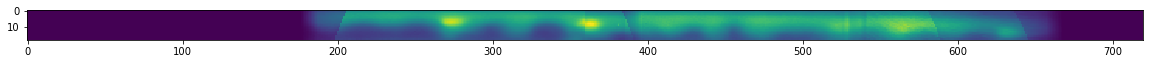

In [4]:
from astropy.io import fits
import numpy as np
data = np.flip(fits.open("../fits/2017may_2.12_neb.fits")[0].data, 0)
plt.figure(figsize=(20, 1))
plt.imshow(data)
plt.show()

In [3]:
from copy import deepcopy

def rollingMedian(data, numWindows=10):
    rollingMed = deepcopy(data)
    windowSize = int(len(data)/numWindows)
    for i in range(0, len(data), windowSize):
        if i+windowSize > len(data):
            rollingMed[i:] = np.full(len(data)-i, np.median(data[i:]))
        else:
            rollingMed[i:i+windowSize] = np.full(windowSize, np.median(data[i:i+windowSize]))
    return rollingMed

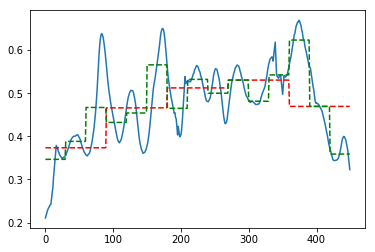

In [5]:
avg = np.mean(data, 0)[190:640]
lon = np.arange(len(avg))
plt.plot(lon, avg)
plt.plot(lon, rollingMedian(avg, numWindows=5), color='red', linestyle='--')
plt.plot(lon, rollingMedian(avg, numWindows=15), color='green', linestyle='--')
plt.show()

In [19]:
from scipy import fft
#(Non-detrended data)

N = len(avg)
fourier = fft(avg)
xf = np.arange(N//2)
plt.plot(xf[1:], 2.0/N * np.abs(fourier[1:N//2]))
plt.show()

In [7]:
#top 10 wave powers in descending order
print(np.flip(np.argsort(fourier[0:N//2]))[:10])
#wave powers corrected for observation width
print(720 / N * np.flip(np.argsort(fourier[0:N//2]))[:10])

[ 0 11  5  6  8 10 16 28 26 23]
[ 0.  17.6  8.   9.6 12.8 16.  25.6 44.8 41.6 36.8]


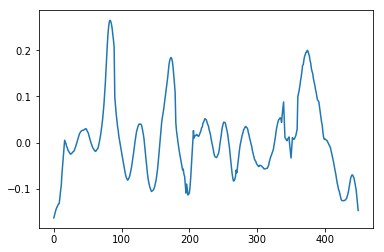

In [9]:
avg_detrended = avg-rollingMedian(avg, numWindows=5)
avg_detrended -= np.median(avg_detrended)
plt.plot(lon, avg_detrended)
plt.show()

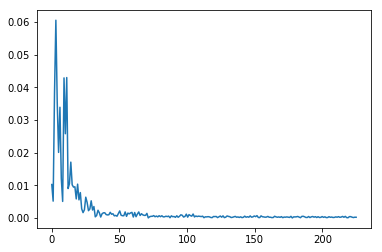

In [74]:
N = len(avg_detrended)
T = 1.0/N
x = np.linspace(0.0, N * T, N)
fourier_detrended = fft(avg_detrended)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(fourier_detrended[0:N//2]))
plt.show()

In [75]:
print(np.flip(np.argsort(fourier_detrended[0:N//2]))[:10])
print(720 / N * np.flip(np.argsort(fourier_detrended[0:N//2]))[:10])

[11  6  5  0 16 10  8 26 21 31]
[17.6  9.6  8.   0.  25.6 16.  12.8 41.6 33.6 49.6]


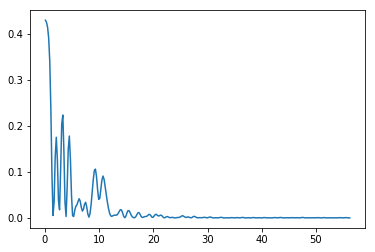

In [82]:
#Using Lomb-Scargle periodogram
from astropy.timeseries import LombScargle

# R14388b5a5a57-1
# Vanderplas, J., Connolly, A. Ivezic, Z. & Gray, A. Introduction to astroML: Machine learning for astrophysics. Proceedings of the Conference on Intelligent Data Understanding (2012)

# R14388b5a5a57-2
# VanderPlas, J. & Ivezic, Z. Periodograms for Multiband Astronomical Time Series. ApJ 812.1:18 (2015)

lon_normed = lon/N
frequency, power = LombScargle(lon_normed,avg).autopower()
plt.plot(frequency[:len(frequency)//20], power[:len(frequency)//20])
plt.show()

In [87]:
print(frequency[np.flip(np.argsort(power[0:len(frequency)//20]))][:20])
print(720 / N * frequency[np.flip(np.argsort(power[0:len(frequency)//20]))][:20])

[ 0.10022272  0.30066815  0.50111359  0.70155902  0.90200445  1.10244989
  3.30734967  3.10690423  4.51002227  2.10467706  4.30957684  3.5077951
  1.90423163  4.71046771  2.30512249  9.32071269  2.9064588   9.12026726
  1.30289532 10.72383073]
[ 0.16035635  0.48106904  0.80178174  1.12249443  1.44320713  1.76391982
  5.29175947  4.97104677  7.21603563  3.3674833   6.89532294  5.61247216
  3.0467706   7.53674833  3.68819599 14.91314031  4.65033408 14.59242762
  2.08463252 17.15812918]


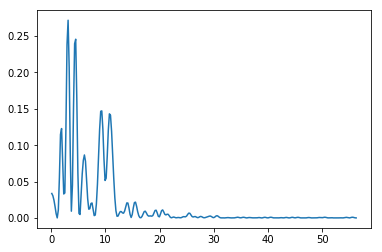

In [93]:
lon_normed = lon/N
frequency, power = LombScargle(lon_normed,avg_detrended).autopower()
plt.plot(frequency[:len(frequency)//20], power[:len(frequency)//20])
plt.show()

In [94]:
# print(frequency[np.flip(np.argsort(power[0:len(frequency)//20]))][:10])
print(720 / N * frequency[np.flip(np.argsort(power[0:len(frequency)//20]))][:10])

[ 4.97104677  7.21603563  6.89532294  4.65033408  5.29175947  7.53674833
  6.57461024 14.91314031 14.59242762 17.15812918]
